# Propuesta Análisis Descriptivo Series de Tiempo

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
#import plotnine
#from plotnine import *

In [3]:
## Paquetes relevantes

import time

import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns


from datetime import datetime
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [27]:
import statsmodels.api as sm

In [4]:
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

https://duchesnay.github.io/pystatsml/statistics/time_series.html

# Intentando Leer xlsx from onedrive

In [5]:
import os

In [6]:
os.getcwd()

'C:\\Users\\USUARIO\\Downloads'

In [11]:
# import OS module

 
# Get the list of all files and directories
path = "C:\\Users\\USUARIO\\Documents\\Maestria Ciencia de Datos\\Proyecto_aplicado_2\\data_tesis"
dir_list = os.listdir(path)
 
print("Archivos y Carpetas en'", path, "' :")
print('\n')
print(dir_list)

Archivos y Carpetas en' C:\Users\USUARIO\Documents\Maestria Ciencia de Datos\Proyecto_aplicado_2\data_tesis ' :


['TOTAL_ECOPETROL 20191001 - 20220930.xlsx', 'TOTAL_ISA 20191001 - 20220930.xlsx', 'TOTAL_PFDAVVNDA 20191001 - 20220930.xlsx']


In [12]:
df_list=[]

for i in dir_list:
    temp_df = pd.read_excel(path + '\\' + i)
    print(str(i)[6:11])
    print('Tamaño Base:',temp_df.shape)
    print('\n')
    df_list.append(temp_df)
    
df_final = pd.concat(df_list)
print('Tamaño Base unida:', df_final.shape)
df_final.head()

ECOPE
Tamaño Base: (734, 10)


ISA 2
Tamaño Base: (734, 10)


PFDAV
Tamaño Base: (734, 10)


Tamaño Base unida: (2202, 10)


,Nemotecnico,fecha,Cantidad,Volumen,Precio Cierre,Precio Mayor,Precio Medio,Precio Menor,Variacion%,Variacion Absoluta
0,ECOPETROL,2019-10-01,5188118,15193441935,2940,2985,2928.51,2915,-0.34,-10
1,ECOPETROL,2019-10-02,10118173,29256790270,2890,2920,2891.51,2880,-1.70,-50
2,ECOPETROL,2019-10-03,4454138,12949623995,2945,2945,2907.32,2870,1.90,55
3,ECOPETROL,2019-10-04,5918547,17360100920,2940,2975,2933.17,2920,-0.17,-5
4,ECOPETROL,2019-10-07,1853824,5486562475,2955,2970,2959.59,2940,0.51,15


In [13]:
df_final.dtypes

Nemotecnico                   object
fecha                 datetime64[ns]
Cantidad                       int64
Volumen                        int64
Precio Cierre                  int64
Precio Mayor                   int64
Precio Medio                 float64
Precio Menor                   int64
Variacion%                   float64
Variacion Absoluta             int64
dtype: object

In [14]:
df_final.describe()

,Cantidad,Volumen,Precio Cierre,Precio Mayor,Precio Medio,Precio Menor,Variacion%,Variacion Absoluta
count,2.202000e+03,2.202000e+03,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,3.214362e+06,1.150977e+10,18813.950954,18953.663942,18764.881989,18458.752952,-0.005704,-6.869210
std,5.582270e+06,1.426506e+10,12851.616241,12998.271182,12834.318126,12698.073858,2.463041,472.606672
min,0.000000e+00,0.000000e+00,1380.000000,0.000000,0.000000,0.000000,-24.090000,-4120.000000
25%,9.630750e+04,2.594586e+09,2940.000000,2960.000000,2932.090000,2894.250000,-1.070000,-129.250000
50%,2.802685e+05,6.246000e+09,21500.000000,21700.000000,21497.980000,21065.000000,0.000000,0.000000
75%,4.964348e+06,1.529951e+10,29147.500000,29500.000000,29090.305000,28600.000000,1.087500,120.000000
max,4.627356e+07,1.466494e+11,46900.000000,47440.000000,46697.850000,46280.000000,14.880000,3660.000000


# Análisis Exploratorio de las series

In [15]:
def valores_faltantes(df):
    zero_val=(df== 0.00).astype(int).sum(0)
    mis_val=df.isnull().sum()
    mis_val_porc= 100 * df.isnull().sum() /len(df)
    mz_tabla = pd.concat([zero_val,mis_val,mis_val_porc],axis=1)
    mz_tabla=mz_tabla.rename(columns = {0:'Valores cero',1:'Valores Perdidos',2: '% de los valores totales'})
    mz_tabla['% Valores cero']=round(100*mz_tabla['Valores cero']/len(df),2)
    mz_tabla['Tipos de datos']= df.dtypes
    return mz_tabla

In [16]:
valores_faltantes(df_final)

,Valores cero,Valores Perdidos,% de los valores totales,% Valores cero,Tipos de datos
Nemotecnico,0,0,0.0,0.00,object
fecha,0,0,0.0,0.00,datetime64[ns]
Cantidad,3,0,0.0,0.14,int64
Volumen,3,0,0.0,0.14,int64
Precio Cierre,0,0,0.0,0.00,int64
Precio Mayor,7,0,0.0,0.32,int64
Precio Medio,3,0,0.0,0.14,float64
Precio Menor,7,0,0.0,0.32,int64
Variacion%,92,0,0.0,4.18,float64
Variacion Absoluta,92,0,0.0,4.18,int64


In [17]:
def plot_time_series(dates, values, title, x_label, y_label):
    """
    dates: debe ser una serie de fecha y hora para el eje x
    values: los valores del eje y para trazar
    title: cadena que va por encima de la gráfica
    x_label: cadena que va en el eje x
    y_label: cadena que va en el eje y
    """

    years_locator = mdates.YearLocator()
    months_locator = mdates.MonthLocator()
    years_format = mdates.DateFormatter('%Y')

    sns.set_style('ticks')
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 6)

    ax.ticklabel_format(axis='y', style='plain')
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

    ax.xaxis.set_major_locator(years_locator)
    ax.xaxis.set_major_formatter(years_format)
    ax.xaxis.set_minor_locator(months_locator)

    sns.lineplot(x=dates, y=values, ci=None)

    rotation = 45
    plt.setp(ax.get_xticklabels(), rotation=rotation)
    plt.xlabel(x_label, fontsize='16')
    plt.ylabel(y_label, fontsize='16')
    plt.title(title, fontsize='18')

    plt.show()

In [18]:
df_final['Nemotecnico']=df_final['Nemotecnico'].str.strip()

In [19]:
acciones=list(df_final['Nemotecnico'].unique())
acciones

['ECOPETROL', 'ISA', 'PFDAVVNDA']

In [20]:
for tipo in df_final.Nemotecnico.unique():
    globals()['df_final_'+tipo]= df_final.loc[df_final['Nemotecnico']== tipo]

In [21]:
df_final_ECOPETROL

,Nemotecnico,fecha,Cantidad,Volumen,Precio Cierre,Precio Mayor,Precio Medio,Precio Menor,Variacion%,Variacion Absoluta
0,ECOPETROL,2019-10-01,5188118,15193441935,2940,2985,2928.51,2915,-0.34,-10
1,ECOPETROL,2019-10-02,10118173,29256790270,2890,2920,2891.51,2880,-1.70,-50
2,ECOPETROL,2019-10-03,4454138,12949623995,2945,2945,2907.32,2870,1.90,55
3,ECOPETROL,2019-10-04,5918547,17360100920,2940,2975,2933.17,2920,-0.17,-5
4,ECOPETROL,2019-10-07,1853824,5486562475,2955,2970,2959.59,2940,0.51,15
...,...,...,...,...,...,...,...,...,...,...
729,ECOPETROL,2022-09-26,5590268,11049455386,1970,2050,1976.55,1940,-3.15,-64
730,ECOPETROL,2022-09-27,4025883,8184754399,2019,2093,2033.03,1992,2.49,49
731,ECOPETROL,2022-09-28,3738569,7598340617,2061,2061,2032.42,1994,2.08,42
732,ECOPETROL,2022-09-29,2743619,5661094712,2080,2083,2063.37,1995,0.92,19


In [22]:
qs=[df_final_ECOPETROL,df_final_ISA,df_final_PFDAVVNDA]

df_name=['df_final_ECOPETROL','df_final_ISA','df_final_PFDAVVNDA']

df_list=list()
for i in qs:
    df_list.append(i)

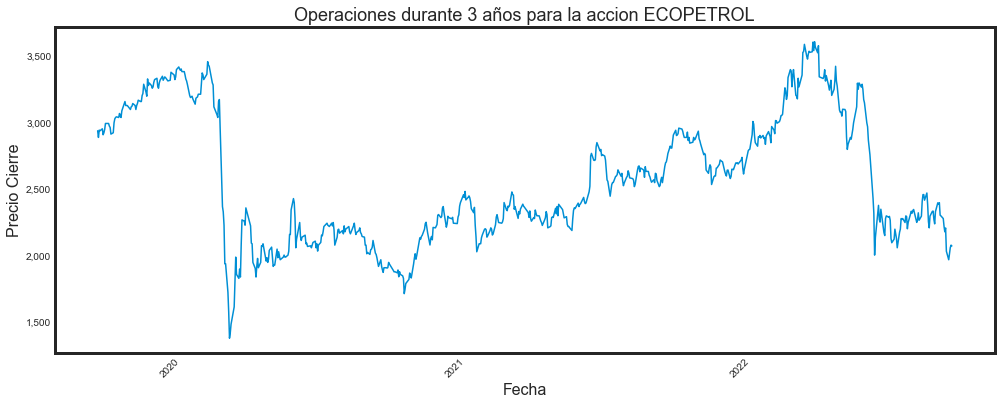

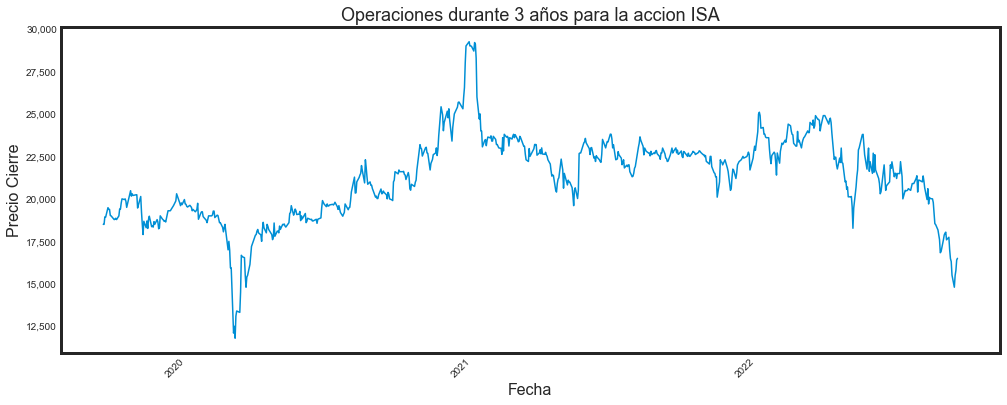

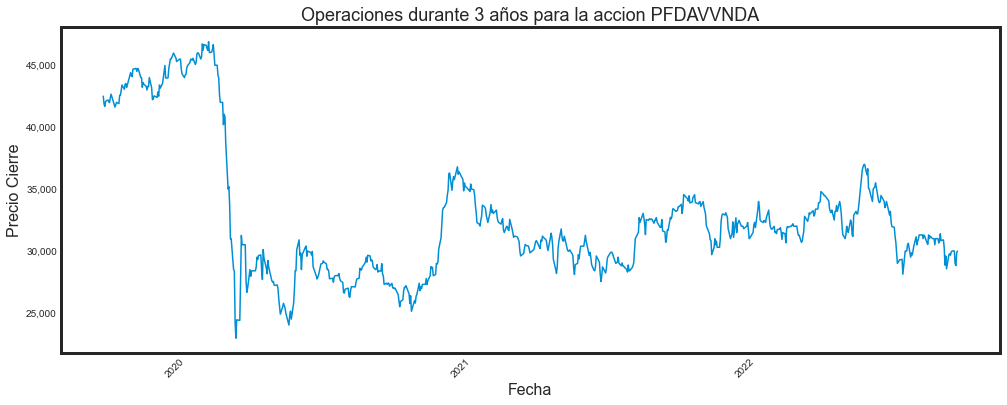

In [23]:
for i in range(len(df_list)):
     plot_time_series(df_list[i]['fecha'], df_list[i]['Precio Cierre'], 'Operaciones durante 3 años para la accion'+' '+str(df_name[i])[9:], 'Fecha', 'Precio Cierre')

### Prueba Dickey Fuller

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
columns=['Accion','Adf_statistic','p_val']
result=[]

print('H0:  La serie es estacionaria (raiz unitaria=1)')
print('Ha:  La serie no es estacionaria')

print('\n')

for i in range(len(df_list)):
    print('Accion:',df_name[i])
    result = adfuller(df_list[i]['Precio Cierre'])
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('\n')

H0:  La serie es estacionaria (raiz unitaria=1)
Ha:  La serie no es estacionaria


Accion: df_final_ECOPETROL
ADF Statistic: -2.111992
p-value: 0.239720


Accion: df_final_ISA
ADF Statistic: -2.502459
p-value: 0.114877


Accion: df_final_PFDAVVNDA
ADF Statistic: -2.445112
p-value: 0.129407




Esto es para calcular la tendencia,ciclo, estacionalidad, pero aun no me sale

### FAC

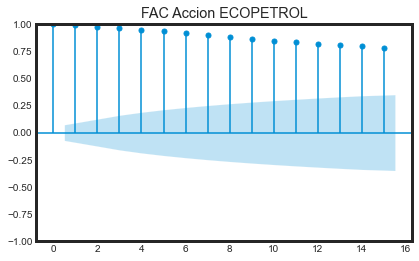

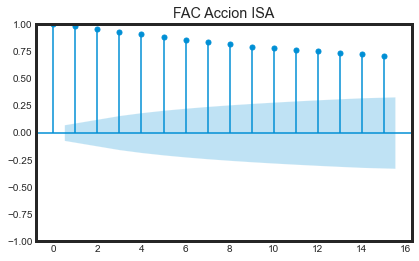

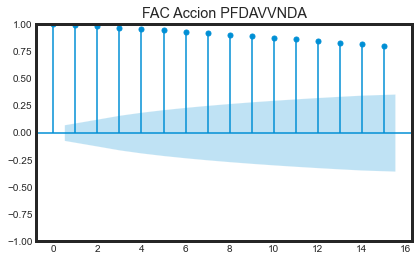

In [28]:
for i in range(len(df_list)):
    sm.graphics.tsa.plot_acf(df_list[i]['Precio Cierre'],lags=15,title='FAC Accion'+' '+str(df_name[i][9:]))
    plt.show()
    #plt.savefig('FAC'+'_'+str(df_name[i])+".png")

### PACF

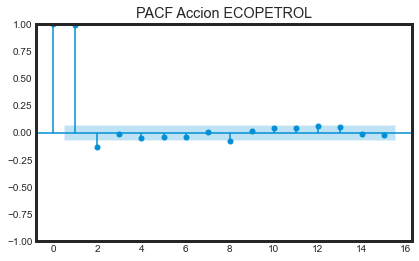

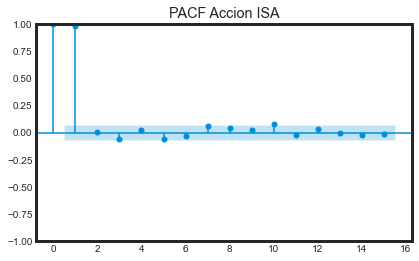

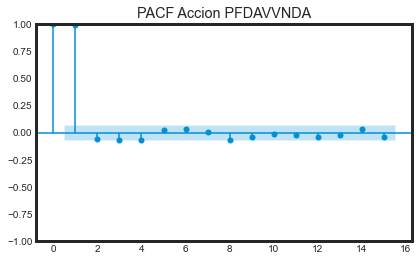

In [29]:
for i in range(len(df_list)):
    sm.graphics.tsa.plot_pacf(df_list[i]['Precio Cierre'],lags=15,title='PACF Accion'+' '+str(df_name[i][9:]))
    plt.show()
    #plt.savefig('PAFC'+'_'+str(df_name[i])+".png")

### Separacion base train-test

In [49]:
df_list1=df_list.copy()

In [51]:
df_list1

[           Nemotecnico  Cantidad      Volumen  Precio Cierre  Precio Mayor  \
 fecha                                                                        
 2019-10-01   ECOPETROL   5188118  15193441935           2940          2985   
 2019-10-02   ECOPETROL  10118173  29256790270           2890          2920   
 2019-10-03   ECOPETROL   4454138  12949623995           2945          2945   
 2019-10-04   ECOPETROL   5918547  17360100920           2940          2975   
 2019-10-07   ECOPETROL   1853824   5486562475           2955          2970   
 ...                ...       ...          ...            ...           ...   
 2022-09-26   ECOPETROL   5590268  11049455386           1970          2050   
 2022-09-27   ECOPETROL   4025883   8184754399           2019          2093   
 2022-09-28   ECOPETROL   3738569   7598340617           2061          2061   
 2022-09-29   ECOPETROL   2743619   5661094712           2080          2083   
 2022-09-30   ECOPETROL   3932254   8181119239      

Fechas train : 2019-10-01 00:00:00 --- 2021-05-28 00:00:00  (n=404)  (Accion=df_final_ECOPETROL)
Fechas test  : 2021-05-31 00:00:00 --- 2022-09-30 00:00:00  (n=330)     (Accion=df_final_ECOPETROL)


Fechas train : 2019-10-01 00:00:00 --- 2021-05-28 00:00:00  (n=404)  (Accion=df_final_ISA)
Fechas test  : 2021-05-31 00:00:00 --- 2022-09-30 00:00:00  (n=330)     (Accion=df_final_ISA)


Fechas train : 2019-10-01 00:00:00 --- 2021-05-28 00:00:00  (n=404)  (Accion=df_final_PFDAVVNDA)
Fechas test  : 2021-05-31 00:00:00 --- 2022-09-30 00:00:00  (n=330)     (Accion=df_final_PFDAVVNDA)




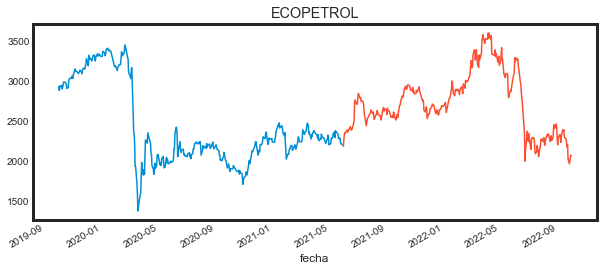

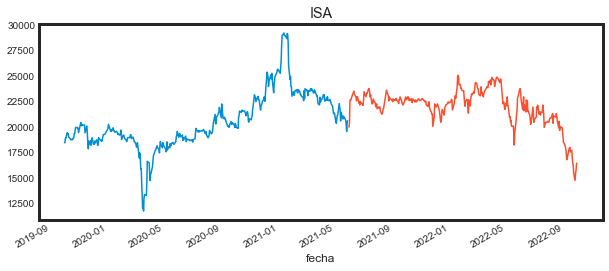

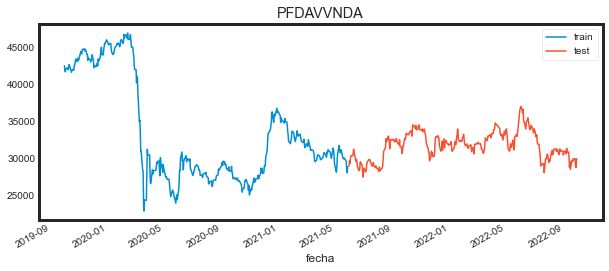

In [52]:
steps = 330

for i in range(len(df_list)):
    
    #df_list1[i].set_index('fecha',inplace=True)
    
    datos_train = df_list1[i][:-steps]
    datos_test  = df_list1[i][-steps:]
    
   


    print(f"Fechas train : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})  (Accion={df_name[i]})")
    print(f"Fechas test  : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})     (Accion={df_name[i]})")
    print('\n')
    fig, ax = plt.subplots(figsize=(9, 4))
    datos_train['Precio Cierre'].plot(ax=ax, label='train',title=str(df_name[i][9:]))
    datos_test['Precio Cierre'].plot(ax=ax, label='test')

ax.legend();
    

# Implementación Modelo Garch

In [41]:
# check correlations of squared observations
from random import gauss
from random import seed
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

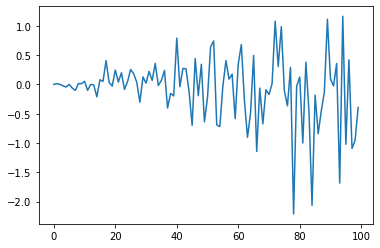

In [6]:
# create a simple white noise with increasing variance
from random import gauss
from random import seed
from matplotlib import pyplot
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# plot
pyplot.plot(data)
pyplot.show()

### Autocorrelacion

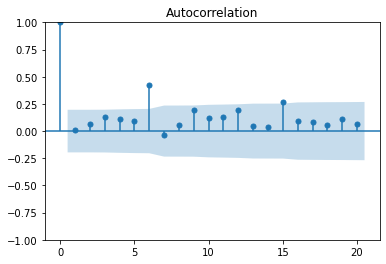

In [34]:
# check correlations of squared observations
from random import gauss
from random import seed
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# square the dataset
squared_data = [x**2 for x in data]
squared_data=pd.Series(squared_data)
# create acf plot
plot_acf(squared_data)
pyplot.show()

In [12]:
pip install arch

Iteration:      1,   Func. Count:     18,   Neg. LLF: 88214.15274343833
Iteration:      2,   Func. Count:     36,   Neg. LLF: 145.16327370105464
Iteration:      3,   Func. Count:     54,   Neg. LLF: 128.0887135967567
Iteration:      4,   Func. Count:     72,   Neg. LLF: 109.21731760967693
Iteration:      5,   Func. Count:     90,   Neg. LLF: 36.505726167454
Iteration:      6,   Func. Count:    108,   Neg. LLF: 39.65736210558854
Iteration:      7,   Func. Count:    126,   Neg. LLF: 28.719728253674663
Iteration:      8,   Func. Count:    143,   Neg. LLF: 28.02026266328528
Iteration:      9,   Func. Count:    161,   Neg. LLF: 34.947196664051255
Iteration:     10,   Func. Count:    180,   Neg. LLF: 30.036303168280703
Iteration:     11,   Func. Count:    198,   Neg. LLF: 26.9167818648405
Iteration:     12,   Func. Count:    216,   Neg. LLF: 35.23299687267175
Iteration:     13,   Func. Count:    235,   Neg. LLF: 25.557794396393337
Iteration:     14,   Func. Count:    253,   Neg. LLF: 25.4968

C:\Users\USUARIO\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


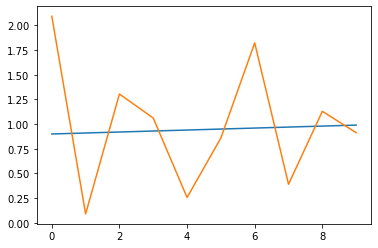

In [13]:
# example of ARCH model
from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]
# define model
model = arch_model(train, mean='Zero', vol='ARCH', p=15)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

### Modelo GARCH

Iteration:      1,   Func. Count:      6,   Neg. LLF: 64973.065543698256
Iteration:      2,   Func. Count:     12,   Neg. LLF: 41.087616850864485
Iteration:      3,   Func. Count:     18,   Neg. LLF: 48.65890659067377
Iteration:      4,   Func. Count:     24,   Neg. LLF: 37.23586175961865
Iteration:      5,   Func. Count:     29,   Neg. LLF: 41.985602059453356
Iteration:      6,   Func. Count:     36,   Neg. LLF: 139.80374654566532
Iteration:      7,   Func. Count:     45,   Neg. LLF: 37.23561737870304
Iteration:      8,   Func. Count:     49,   Neg. LLF: 37.23561663859811
Optimization terminated successfully    (Exit mode 0)
            Current function value: 37.23561737870304
            Iterations: 9
            Function evaluations: 49
            Gradient evaluations: 8


C:\Users\USUARIO\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


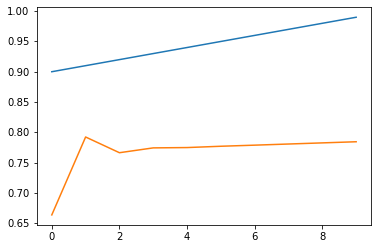

In [39]:

from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]
# define model
model = arch_model(train, mean='Zero', vol='GARCH', p=2, q=1)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

### Aplicandolo a nuestro Trabajo

### Desarrollando un modelo base GARCH(p=1,q=1)

In [42]:
df_list1[0].shape

(734, 9)

Iteration:      1,   Func. Count:      5,   Neg. LLF: 12837.529065754092
Iteration:      2,   Func. Count:     12,   Neg. LLF: 3713.728845436909
Iteration:      3,   Func. Count:     16,   Neg. LLF: 3713.7270088158843
Iteration:      4,   Func. Count:     20,   Neg. LLF: 3713.719523189583
Iteration:      5,   Func. Count:     24,   Neg. LLF: 3713.709730227243
Iteration:      6,   Func. Count:     28,   Neg. LLF: 3713.709723115026
Iteration:      7,   Func. Count:     31,   Neg. LLF: 3713.709723117141
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3713.709723115026
            Iterations: 7
            Function evaluations: 31
            Gradient evaluations: 7


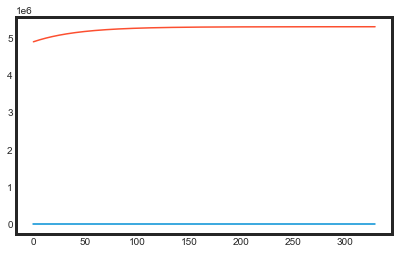

Iteration:      1,   Func. Count:      5,   Neg. LLF: 13696.830228962746
Iteration:      2,   Func. Count:     12,   Neg. LLF: 4582.4610350135645
Iteration:      3,   Func. Count:     16,   Neg. LLF: 4582.4609861663785
Iteration:      4,   Func. Count:     20,   Neg. LLF: 4582.460857334761
Iteration:      5,   Func. Count:     24,   Neg. LLF: 4582.460829254345
Iteration:      6,   Func. Count:     28,   Neg. LLF: 4582.46080357789
Iteration:      7,   Func. Count:     32,   Neg. LLF: 4582.460762196604
Iteration:      8,   Func. Count:     36,   Neg. LLF: 4582.460745361026
Iteration:      9,   Func. Count:     40,   Neg. LLF: 4582.46074214398
Iteration:     10,   Func. Count:     43,   Neg. LLF: 4582.460742143894
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4582.46074214398
            Iterations: 10
            Function evaluations: 43
            Gradient evaluations: 10


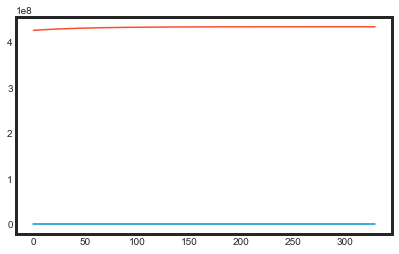

Iteration:      1,   Func. Count:      5,   Neg. LLF: 13897.207140752173
Iteration:      2,   Func. Count:     12,   Neg. LLF: 4773.506269836429
Iteration:      3,   Func. Count:     16,   Neg. LLF: 4773.503757301432
Iteration:      4,   Func. Count:     20,   Neg. LLF: 4773.493501053763
Iteration:      5,   Func. Count:     24,   Neg. LLF: 4773.48000209428
Iteration:      6,   Func. Count:     28,   Neg. LLF: 4773.479988582921
Iteration:      7,   Func. Count:     31,   Neg. LLF: 4773.47998858409
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4773.479988582921
            Iterations: 7
            Function evaluations: 31
            Gradient evaluations: 7


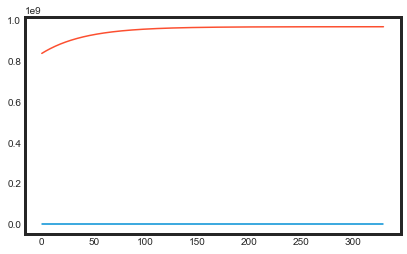

In [43]:
from matplotlib import pyplot
from arch import arch_model

for i in range(len(df_list1)):
    
    n_test = 330
    train, test = df_list1[i][:-n_test], df_list1[i][-n_test:]
    
    train=train['Precio Cierre']
    train = train.astype('double')
    test=test['Precio Cierre']
    test = test.astype('double')

    # define model
    
    model = arch_model(train, mean='Zero', vol='GARCH', p=1, q=1)
    # fit model
    model_fit = model.fit()
    # forecast the test set
    yhat = model_fit.forecast(horizon=n_test)
    # plot the actual variance
    var = [i*0.01 for i in range(0,734)]
    pyplot.plot(var[-steps:])
    # plot forecast variance
    pyplot.plot(yhat.variance.values[-1, :])
    pyplot.show()

### Tuneando Hiperparametros para modelo GARCH

https://arch.readthedocs.io/en/latest/univariate/generated/arch.univariate.GARCH.html#arch.univariate.GARCH

In [45]:
from tqdm import tqdm_notebook
from itertools import product

p = range(0, 3, 1)
q = range(0, 3, 1)

parameters = product(p, q)
parameters_list = list(parameters)
print(len(parameters_list))
parameters_list

9


[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [1]:
def optimize_GARCH(parameters_list, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = arch_model(exog, mean='Zero', vol='GARCH', p=param[0],q=param[1]).fit()
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    result_df = result_df.sort_values(by= 'AIC',ascending=True).reset_index(drop=True)
    
    return result_df

In [47]:
for i in range(len(df_list1)):
    
    n_test = 330
    train, test = df_list1[i][:-n_test], df_list1[i][-n_test:]
    
    train=train['Precio Cierre']
    train = train.astype('double')
    test=test['Precio Cierre']
    test = test.astype('double')

    result_df_garch = optimize_GARCH(parameters_list, train)
    print(df_name[i][9:])
    print(result_df_garch)
    print('\n')

  0%|          | 0/9 [00:00<?, ?it/s]

Iteration:      1,   Func. Count:      4,   Neg. LLF: 3732.407912410902
Iteration:      2,   Func. Count:      8,   Neg. LLF: 3717.889017843473
Iteration:      3,   Func. Count:     11,   Neg. LLF: 3717.572037813716
Iteration:      4,   Func. Count:     14,   Neg. LLF: 3717.549366667536
Iteration:      5,   Func. Count:     17,   Neg. LLF: 3717.5489836926617
Iteration:      6,   Func. Count:     19,   Neg. LLF: 3717.54898369285
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3717.5489836926617
            Iterations: 6
            Function evaluations: 19
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      5,   Neg. LLF: 12837.529065754092
Iteration:      2,   Func. Count:     12,   Neg. LLF: 3713.728845436909
Iteration:      3,   Func. Count:     16,   Neg. LLF: 3713.7270088158843
Iteration:      4,   Func. Count:     20,   Neg. LLF: 3713.719523189583
Iteration:      5,   Func. Count:     24,   Neg. LLF: 3713.70973022724

  0%|          | 0/9 [00:00<?, ?it/s]

Iteration:      1,   Func. Count:      4,   Neg. LLF: 4598.715032593265
Iteration:      2,   Func. Count:      8,   Neg. LLF: 4584.408937791295
Iteration:      3,   Func. Count:     11,   Neg. LLF: 4584.137580135479
Iteration:      4,   Func. Count:     14,   Neg. LLF: 4584.121591842837
Iteration:      5,   Func. Count:     17,   Neg. LLF: 4584.121379620868
Iteration:      6,   Func. Count:     19,   Neg. LLF: 4584.1213796209795
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4584.121379620868
            Iterations: 6
            Function evaluations: 19
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      5,   Neg. LLF: 13696.830228962746
Iteration:      2,   Func. Count:     12,   Neg. LLF: 4582.4610350135645
Iteration:      3,   Func. Count:     16,   Neg. LLF: 4582.4609861663785
Iteration:      4,   Func. Count:     20,   Neg. LLF: 4582.460857334761
Iteration:      5,   Func. Count:     24,   Neg. LLF: 4582.4608292543

  0%|          | 0/9 [00:00<?, ?it/s]

Iteration:      1,   Func. Count:      4,   Neg. LLF: 4792.174094740815
Iteration:      2,   Func. Count:      8,   Neg. LLF: 4777.629830895727
Iteration:      3,   Func. Count:     11,   Neg. LLF: 4777.312269946536
Iteration:      4,   Func. Count:     14,   Neg. LLF: 4777.289488168286
Iteration:      5,   Func. Count:     17,   Neg. LLF: 4777.289102900277
Iteration:      6,   Func. Count:     19,   Neg. LLF: 4777.289102900466
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4777.289102900277
            Iterations: 6
            Function evaluations: 19
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      5,   Neg. LLF: 13897.207140752173
Iteration:      2,   Func. Count:     12,   Neg. LLF: 4773.506269836429
Iteration:      3,   Func. Count:     16,   Neg. LLF: 4773.503757301432
Iteration:      4,   Func. Count:     20,   Neg. LLF: 4773.493501053763
Iteration:      5,   Func. Count:     24,   Neg. LLF: 4773.48000209428
I

In [24]:
result_df_garch

,"(p,q)",AIC
0,"(2, 1)",82.471235
1,"(2, 2)",84.471235
2,"(1, 1)",87.476521
3,"(1, 2)",89.476520
4,"(2, 0)",136.042247
5,"(1, 0)",142.689905


# Aqui vamos

# ---------------------------------------------------------------------------------------------------------------